# CS306: Data Analysis and Visualization

### Assignment 2
---


**Name: Pratvi Shah**


**Student ID: 201801407**

In [2]:
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
from scipy import stats
from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression,RANSACRegressor
from scipy.optimize import curve_fit,least_squares
import math
import random
from matplotlib import cm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Q1

In [50]:

x=[0 ,1 ,3 ,3 ,4 ,5 ,5 ,6]
y=[2 ,3 ,3 ,4 ,5 ,6 ,7 ,7]


## Q1 a)

In [6]:
def get_slope_const(x,y,mu_x,mu_y):
    N = np.sum((x-mu_x)*(y-mu_y))
    D = np.sum((x-mu_x)*(x-mu_x))
    beta1 = N/D

    beta0= mu_y - beta1*mu_x 
    
    return beta0,beta1

In [7]:
mu_x=np.mean(x)
mu_y=np.mean(y)

In [8]:
print('Mean of x:',mu_x)
print('Mean of y:',mu_y)
print('Standard deviation of x:',np.std(x))
print('Standard deviation of y:',np.std(y))

Mean of x: 3.375
Mean of y: 4.625
Standard deviation of x: 1.9324531042175384
Standard deviation of y: 1.79843682124227


In [9]:
beta0,beta1 = get_slope_const(x,y,mu_x,mu_y)
print('beta0 = ',beta0)
print('beta1 = ',beta1)


beta0 =  1.6736401673640167
beta1 =  0.8744769874476988


In [10]:
ypred = [beta0 + x[i]*beta1 for i in range(len(x))]

In [11]:
rmse=np.sqrt(mean_squared_error(y,ypred))
print('RMSE of y and ypred: ',rmse)
r2=r2_score(y,ypred)
print('R squared: ',r2)

RMSE of y and ypred:  0.6153544408437377
R squared:  0.882926040466517


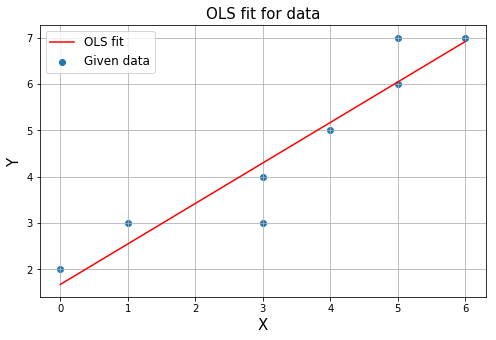

In [12]:
plt.figure(figsize=[8,5])
plt.scatter(x,y,marker='o',label='Given data')
plt.plot(x,ypred,'r-',label='OLS fit')
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.title('OLS fit for data',fontsize=15)
plt.grid()
plt.legend(fontsize=12)

## Q1 b)

In [13]:
x_normalized = (x-mu_x)/np.std(x)
y_normalized = (y-mu_y)/np.std(y)

In [14]:
b0,b1 = get_slope_const(x_normalized,y_normalized,0,0)
print('after normalization beta0 = ',b0)
print('after normalization beta1 = ',b1)


after normalization beta0 =  0.0
after normalization beta1 =  0.9396414425016155


In [15]:
y_pred_normalized = [b0 + x_normalized[i]*b1 for i in range(len(x_normalized))]

In [16]:
rmse_norm=np.sqrt(mean_squared_error(y_normalized,y_pred_normalized))
print('RMSE of y_normalized and y_pred_normalized: ',rmse_norm)
r2_n=r2_score(y_normalized,y_pred_normalized)
print('R squared:',r2_n)

RMSE of y_normalized and y_pred_normalized:  0.34216072178653545
R squared: 0.8829260404665171


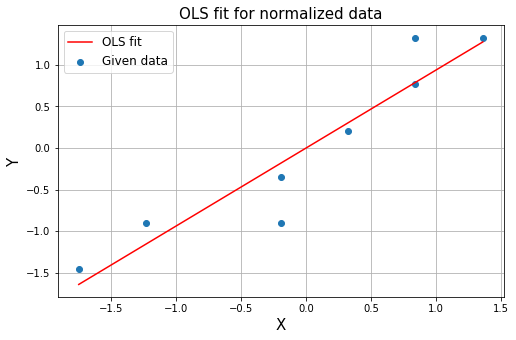

In [17]:
plt.figure(figsize=[8,5])
plt.scatter(x_normalized,y_normalized,marker='o',label='Given data')
plt.plot(x_normalized,y_pred_normalized,'r-',label='OLS fit')
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.title('OLS fit for normalized data',fontsize=15)
plt.grid()
plt.legend(fontsize=12)

### Q1 c)

In [27]:
out_x = 12
out_y = -100
x.append(out_x)
y.append(out_y)
print(x)
print(y)

[0, 1, 3, 3, 4, 5, 5, 6, 12]
[2, 3, 3, 4, 5, 6, 7, 7, -100]


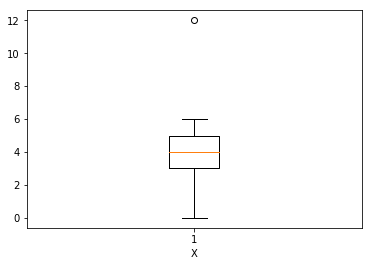

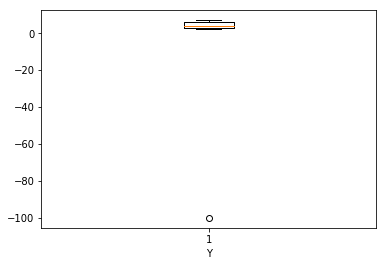

In [19]:
plt.xlabel('X')
plt.boxplot(x)
plt.show()
plt.xlabel('Y')
plt.boxplot(y)
plt.show()

### Q1 d)

### RANSAC Pseudo code

     itr_max= specify the number of iterations
     n= 2 # >=2 elements needed to get a linear fit 
     init_p= initial probability to tolerate outliers 
     err= error tolerance for outliers
 
     do:
    
        temp_data= select n random samples out of the data
        temp_fit= get fit of temp_data i.e., slope and intercept in case of line
        predicted= predicted values of data using temp_fit paramenters
        inliers=[]
        inlier_count=0

        for sample in data:
            if error between sample and predicted < err:
                sample is an inlier 
                add sample to inliners
                inlier_count++
            end if
        end for

        fit_err = (data_size-inliner_count)/data_size
        if fit_err < init_p:
            init_p= fit_err
            good_fit= temp_fit
            iter_count++
         end if

     while iter_count<itr_max 

     ans = good_fit

In [41]:
x_axis

array([-1])

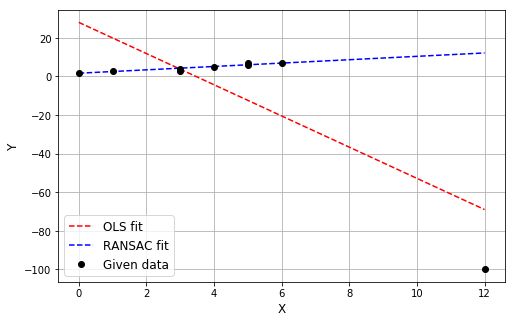

In [48]:
x=[0, 1, 3, 3, 4, 5, 5, 6, 12]
y=[2, 3, 3, 4, 5, 6, 7, 7, -100]

x_axis=np.array(x)
x_axis=x_axis.reshape(-1, 1)


plt.figure(figsize=[8,5])
l_reg = LinearRegression()
ypred_lr = l_reg.fit(x_axis,np.array(y))
ypred_lr=ypred_lr.predict(x_axis)
plt.plot(x,ypred_lr,'r--',label='OLS fit')
ransac= RANSACRegressor()
ypred_ransac = ransac.fit(x_axis,np.array(y))
ypred_ransac = ypred_ransac.predict(x_axis)
plt.plot(x_axis,ypred_ransac,'b--',label='RANSAC fit')
plt.plot(x,y,'ko',label='Given data')
plt.legend(fontsize=12)
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.grid()

### Q1 f)

In [51]:
x2 = [x[i]*x[i] for i in range(len(x))]
A = np.array([x2 , x , np.ones(len(x))])
Aty=np.matmul(A,y)
AtA=np.matmul(A,A.transpose())
A_pseudo_inv=np.linalg.inv(AtA)

In [52]:
ans= np.matmul(A_pseudo_inv,Aty)#np.linalg.lstsq(B,rhs)
ans[0],ans[1],ans[2]

(0.09841211225996682, 0.29265140324964456, 2.1488183161004386)

In [53]:
y_p = [x[i]*x[i]*ans[0] + x[i]*ans[1] + ans[2] for i in range(len(x))]

In [54]:
rmse_p=np.sqrt(mean_squared_error(y,y_p))
print('RMSE of y and y_p: ',rmse_p)
r2_p=r2_score(y,y_p)
print('R squared:',r2_p)

RMSE of y and y_p:  0.5185801830034008
R squared: 0.9168539806906


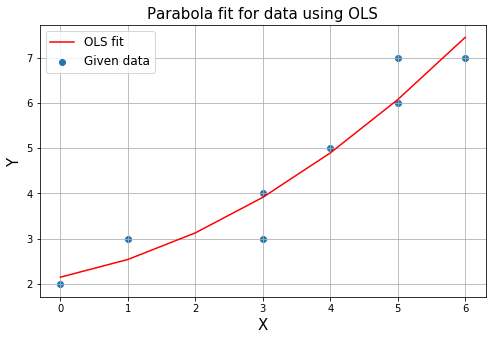

In [55]:
plt.figure(figsize=[8,5])
x_axis=np.arange(min(x),max(x)+1)
y_p_temp=ans[0]*x_axis*x_axis + ans[1]*x_axis + ans[2]
plt.scatter(x,y,marker='o',label='Given data')
plt.plot(x_axis,y_p_temp,'r-',label='OLS fit')
plt.xlabel('X',fontsize=15)
plt.ylabel('Y',fontsize=15)
plt.title('Parabola fit for data using OLS',fontsize=15)
plt.grid()
plt.legend(fontsize=12)

# Q2

In [50]:
m=[[12 ,-4, 0, 0 ,0],[4 ,12 ,0 ,0 ,0],[0 ,0 ,2 ,0 ,0],[0 ,0 ,0 ,1 ,-1],[0 ,0 ,0 ,-1 ,1]]
m=np.array(m)

### Q2 b)

In [51]:
mmT=np.matmul(m.T,m)
mmT

array([[160,   0,   0,   0,   0],
       [  0, 160,   0,   0,   0],
       [  0,   0,   4,   0,   0],
       [  0,   0,   0,   2,  -2],
       [  0,   0,   0,  -2,   2]])

### Q2 c)

In [52]:
eig_values,eig_vectors = np.linalg.eig(mmT)

In [53]:
eig_values

array([4.0000000e+00, 4.4408921e-16, 1.6000000e+02, 1.6000000e+02,
       4.0000000e+00])

In [54]:
eig_vectors

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [-0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ]])

In [67]:
pd.DataFrame(np.matmul((eig_values*eig_vectors),np.linalg.inv(eig_vectors)))

,0,1,2,3,4
0,160.0,0.0,0.0,0.0,0.0
1,0.0,160.0,0.0,0.0,0.0
2,0.0,0.0,4.0,0.0,0.0
3,0.0,0.0,0.0,2.0,-2.0
4,0.0,0.0,0.0,-2.0,2.0


### Q2 d)

In [13]:
def find_svd():
    m=[[12 ,-4, 0, 0 ,0],[4 ,12 ,0 ,0 ,0],[0 ,0 ,2 ,0 ,0],[0 ,0 ,0 ,1 ,-1],[0 ,0 ,0 ,-1 ,1]]
    u,s,vt=np.linalg.svd(m)
    return u,s,vt

In [14]:
u

array([[-0.31622777, -0.9486833 ,  0.        ,  0.        ,  0.        ],
       [ 0.9486833 , -0.31622777,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  0.        ,  0.70710678],
       [ 0.        ,  0.        ,  0.70710678,  0.        ,  0.70710678]])

In [15]:
s

array([1.26491106e+01, 1.26491106e+01, 2.00000000e+00, 2.00000000e+00,
       3.35470445e-17])

In [16]:
vt

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ],
       [-1.        , -0.        , -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.70710678,  0.70710678],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        , -0.70710678, -0.70710678]])

In [70]:
u@np.diag(s)@vt

array([[12., -4.,  0.,  0.,  0.],
       [ 4., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -1.],
       [ 0.,  0.,  0., -1.,  1.]])

# Q3

In [46]:
m1=[47,53,49,50,48,46]
m2=[55,54,58,61,55,52]
m3=[54,50,51,51,50,49]

n=len(m1)
df=[m1,m2,m3]
mean_m1=np.mean(m1)
mean_m2=np.mean(m2)
mean_m3=np.mean(m3)
mean_all=(np.sum(m1)+np.sum(m2)+np.sum(m3))/(n*3)

In [40]:
m1=np.array([47,53,49,50,48,46])
m2=np.array([55,54,58,61,55,52])
m3=np.array([54,50,51,51,50,49])
n=len(m1)
m1=m1.transpose()
m2=m2.transpose()
m3=m3.transpose()
df=np.array([m1,m2,m3]).transpose()

mean_m1=np.mean(m1)
mean_m2=np.mean(m2)
mean_m3=np.mean(m3)
mean_all=(np.sum(m1)+np.sum(m2)+np.sum(m3))/(n*3)

In [41]:
df

array([[47, 55, 54],
       [53, 54, 50],
       [49, 58, 51],
       [50, 61, 51],
       [48, 55, 50],
       [46, 52, 49]])

In [47]:
mean_m1,mean_m2,mean_m3,mean_all

(48.833333333333336,
 55.833333333333336,
 50.833333333333336,
 51.833333333333336)

In [57]:
mean=[]
for i in range(len(df)):
    mean.append(np.mean(df[i]))
mean
mean_A=np.mean(mean)
Sx=np.sum((mean-mean_A)**2)
Sp=0
for i in range(len(df)):
    Sp+=np.sum((df[i]-mean[i])**2)
Sp/=2
print(3*Sx,Sp*2,3*Sx/Sp)

78.0 96.50000000000001 1.6165803108808288


### Q3 a)

In [51]:
Sx = ((mean_m1 - mean_all)**2 +  (mean_m2 - mean_all)**2  + (mean_m3 - mean_all)**2)
print('Variance amongst the three sample means: ',6*Sx)

Variance amongst the three sample means:  156.0


### Q3 b)

In [52]:
Sp = np.sum((m1-mean_m1)**2) + np.sum((m2-mean_m2)**2) + np.sum((m3-mean_m3)**2)
print('Residual variance: ',Sp)

Residual variance:  96.50000000000001


In [53]:
F=(6*Sx/2)/(Sp/(15))
F

12.124352331606216

### Q3 c)

In [60]:
degree_of_freedom_Sp = 3*(n-1)
degree_of_freedom_Sx = 2 #3-1 

In [61]:
print('Degree of freedom for F are Sp = '+str(degree_of_freedom_Sp) + ' and Sx = '+str(degree_of_freedom_Sx))

Degree of freedom for F are Sp = 15 and Sx = 2


In [62]:
F = (Sx/Sp)*(degree_of_freedom_Sp/degree_of_freedom_Sx)
print('F value for the given data: ',F)

F value for the given data:  12.124352331606216


In [22]:
# p_value,f=stats.f_oneway(m1,m2,m3).pvalue
stats.f_oneway(m1,m2,m3)
# print('p value for the given data: '+str(p_value)+'f:'+str(f))

F_onewayResult(statistic=12.124352331606218, pvalue=0.000736197742991534)

### Q3 e)

In [64]:
df2=pd.DataFrame(np.array(df).transpose())
df2

,0,1,2
0,47,55,54
1,53,54,50
2,49,58,51
3,50,61,51
4,48,55,50
5,46,52,49


In [65]:
sr=[]
for i in range(len(df2[0])):
    sr.append(np.sum(df2.iloc[i,:]))
sr=np.array(sr)

In [66]:
sc=[]
for i in range(df2.shape[1]):
    sc.append(np.sum(df2[i]))
sc=np.array(sc)

In [67]:
sst=np.sum(sc)

In [68]:
ss=0
for i in range(df2.shape[1]):
    for j in range(df2.shape[0]):
        ss+= df2[i][j]*df2[i][j]

N=df2.shape[0]*df2.shape[1] 


In [74]:
ss

48613

In [69]:
SST = ss - sst*sst/N
SST

252.5

In [70]:
SSC = np.sum(sc**2)/6 - sst*sst/N
SSC

156.0

In [71]:
SSR = np.sum(sr**2)/3 - sst*sst/N
SSR

43.16666666666424

In [72]:
SSE = SST - SSC - SSR
SSE

53.33333333333576

In [76]:
MSC=SSC/2
MSR=SSR/5
MSE=SSE/10

FC=MSC/MSE
FR=MSR/MSE

FC,FR

(14.624999999999336, 1.6187499999998354)

In [77]:
MSC,MSR,MSE


(78.0, 8.633333333332848, 5.3333333333335755)